# Song Recommendation System

In [1]:
# General tools
import os
import datetime

#For data Handling
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split

In [2]:
dataframe = pd.read_csv('data/data.csv')

In [3]:
dataframe.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
dataframe.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

Data Cleaning

In [8]:
#Convert miliseconds duration into minutes
dataframe['duration_min'] = dataframe['duration_ms']/60000
dataframe['duration_min'] = dataframe['duration_min'].round(2)

dataframe['duration_min'].head()

0    2.12
1    1.64
2    3.03
3    2.95
4    2.72
Name: duration_min, dtype: float64

In [11]:
#Create year column from release_date column
dataframe['year']=dataframe['release_date'].str[0:4]
dataframe['release_date']=dataframe['year']
dataframe['release_date'] = dataframe.year.astype('int64')
dataframe['release_date'].head()

0    1922
1    1922
2    1922
3    1922
4    1922
Name: release_date, dtype: int64

In [12]:
#Remove the Square Brackets from the artists

dataframe["artists"]=dataframe["artists"].str.replace("[", "")
dataframe["artists"]=dataframe["artists"].str.replace("]", "")
dataframe["artists"]=dataframe["artists"].str.replace("'", "")

dataframe.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,2.12,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1.64,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,3.03,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,2.95,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,2.72,1922


In [13]:
#Add Song decade column in the dataset
dataframe['Song Decade'] = None

dataframe.loc[(dataframe['release_date'] >= 1920) & (dataframe['release_date'] < 1930), 'Song Decade'] = '1920s'
dataframe.loc[(dataframe['release_date'] >= 1930) & (dataframe['release_date'] < 1940), 'Song Decade'] = '1930s'
dataframe.loc[(dataframe['release_date'] >= 1940) & (dataframe['release_date'] < 1950), 'Song Decade'] = '1940s'
dataframe.loc[(dataframe['release_date'] >= 1950) & (dataframe['release_date'] < 1960), 'Song Decade'] = '1950s'
dataframe.loc[(dataframe['release_date'] >= 1960) & (dataframe['release_date'] < 1970), 'Song Decade'] = '1960s'
dataframe.loc[(dataframe['release_date'] >= 1970) & (dataframe['release_date'] < 1980), 'Song Decade'] = '1970s'
dataframe.loc[(dataframe['release_date'] >= 1980) & (dataframe['release_date'] < 1990), 'Song Decade'] = '1980s'
dataframe.loc[(dataframe['release_date'] >= 1990) & (dataframe['release_date'] < 2000), 'Song Decade'] = '1990s'
dataframe.loc[(dataframe['release_date'] >= 2000) & (dataframe['release_date'] < 2010), 'Song Decade'] = '2000s'
dataframe.loc[(dataframe['release_date'] >= 2010) & (dataframe['release_date'] < 2020), 'Song Decade'] = '2010s'
dataframe.loc[(dataframe['release_date'] >= 2020) & (dataframe['release_date'] < 2030), 'Song Decade'] = '2020s'

dataframe.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,year,Song Decade
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,2.12,1922,1920s
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1.64,1922,1920s
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,3.03,1922,1920s
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,2.95,1922,1920s
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,2.72,1922,1920s


Drop Duplicated

In [14]:
dataframe.duplicated().any().sum()

0

There are not any duplicates in the data set because of the unique id feature.Let's see if we remove this are there any duplicates

In [15]:
dataframe = dataframe.drop(labels=['id'], axis=1)
dataframe.shape

(586672, 22)

In [16]:
dataframe.duplicated().sum()

1890

After the Unique features removal, there are 1890 duplicates found in the dataset which needs to be removed

In [17]:
dataframe = dataframe[~dataframe.duplicated()==1]
dataframe.shape

(584782, 22)

In [18]:
dataframe.duplicated().sum()

0

In [19]:
dataframe.head()

,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,year,Song Decade
0,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,0,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,2.12,1922,1920s
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,0,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1.64,1922,1920s
2,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,1,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,3.03,1922,1920s
3,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,7,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,2.95,1922,1920s
4,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,2.72,1922,1920s


In [20]:
dataframe.duration_min.sum()/(24*365*60)

4.265764041095893

Spotify has 1554.9 days of music or 4.26 year of continous listening. In other words it will take 4.26 years for you to listen to all the songs

In [21]:
#Drop the columns
dataframe.drop(['duration_ms'],inplace=True,axis=1)

In [22]:
plt.rcParams.update({'font.size': 22})

<AxesSubplot:xlabel='mode', ylabel='Density'>

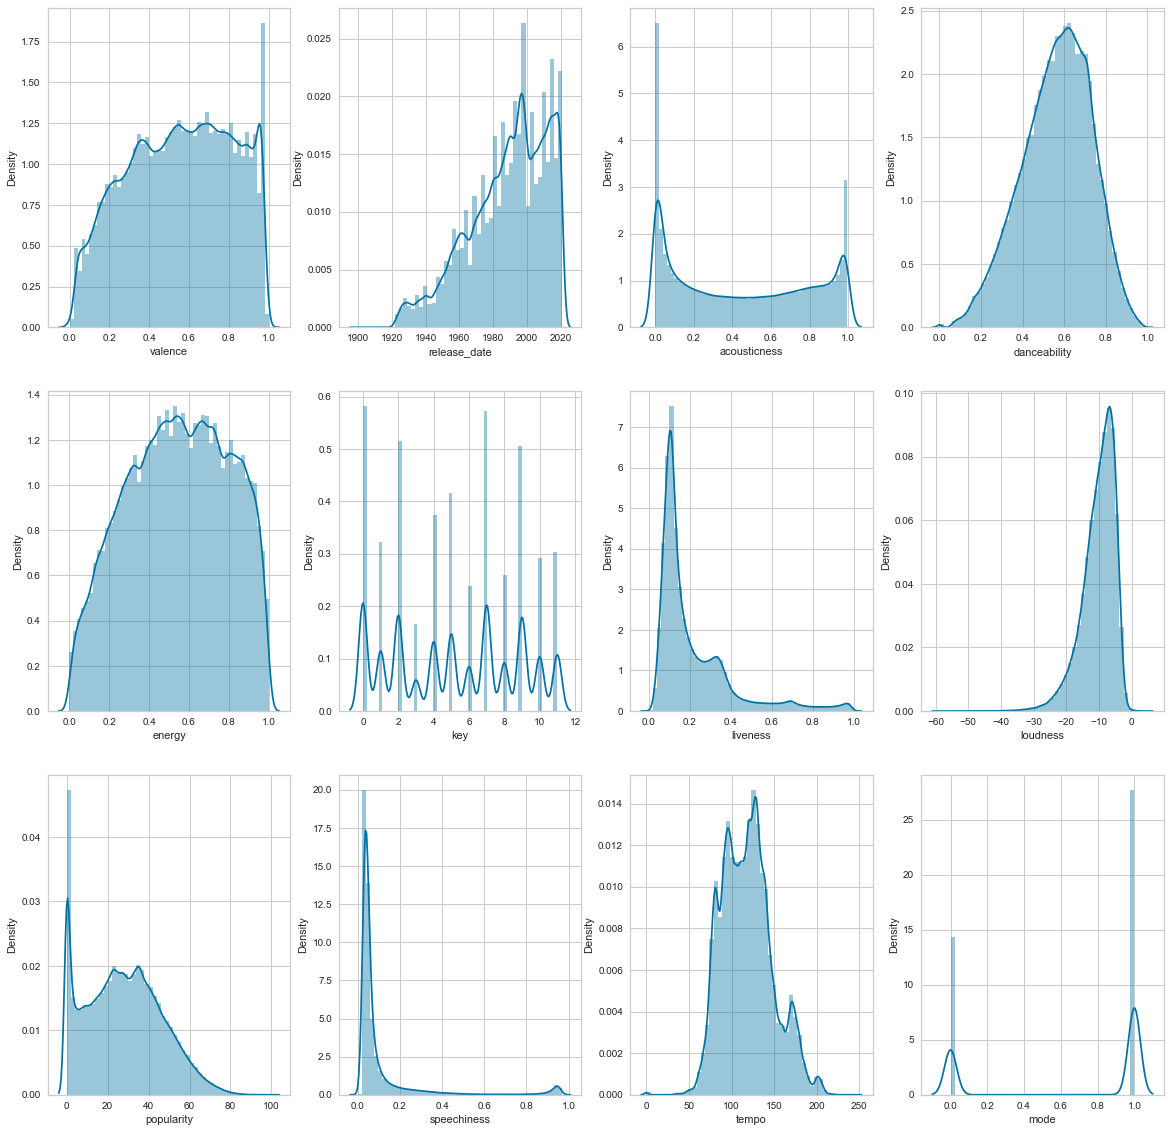

In [24]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(dataframe['valence'],ax=ax[0,0])
sns.distplot(dataframe['release_date'],ax=ax[0,1])
sns.distplot(dataframe['acousticness'],ax=ax[0,2])
sns.distplot(dataframe['danceability'],ax=ax[0,3])
sns.distplot(dataframe['energy'],ax=ax[1,0])
sns.distplot(dataframe['key'],ax=ax[1,1])
sns.distplot(dataframe['liveness'],ax=ax[1,2])
sns.distplot(dataframe['loudness'],ax=ax[1,3])
sns.distplot(dataframe['popularity'],ax=ax[2,0])
sns.distplot(dataframe['speechiness'],ax=ax[2,1])
sns.distplot(dataframe['tempo'],ax=ax[2,2])
sns.distplot(dataframe['mode'],ax=ax[2,3])

<AxesSubplot:>

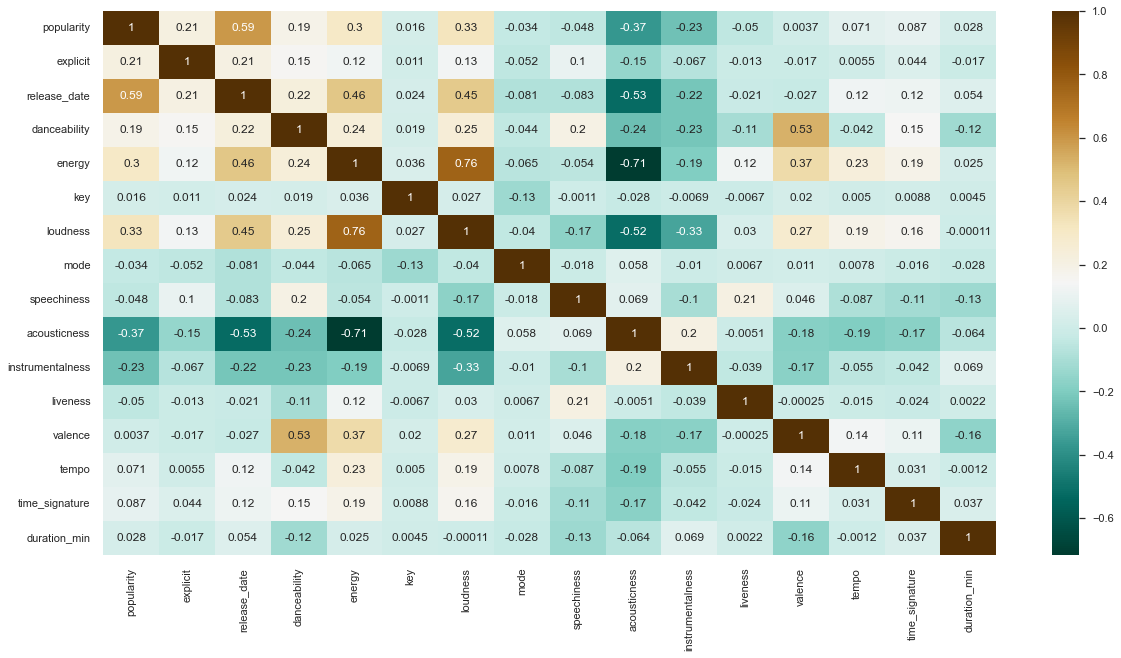

In [26]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = dataframe.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

Observation As you can see above, year, danceability, energy, loudness and tempo are important features for predicting popularity.

Valence and Danceability are highly related and so is speechiness and Danceability

From the above correlation table we can derive some basic insights as to what attributes make a song more popular.

1) As expected popularity is highly correlated with the year released. This makes sense as the Spotify algorithm which makes this decision generates it's "popularity" metric by not just how many streams a song receives, but also how recent those streams are.

2) Energy also seems to influence a song's popularity. Many popular songs are energetic, though not necessarily dance songs. Because the correlation here is not too high, low energy songs do have some potential to be more popular.

3) Acousticness seems to be uncorrelated with popularity. Most popular songs today have either electronic or electric instruments in them. It is very rare that a piece of music played by a chamber orchestra or purely acoustic band becomes immesely popular (though, again, not impossible).

Other things worth noting:

1) Loudness and energy are highly correlated. This makes some sense as energy is definately influence by the volume the music is being played at.

2) Acousticness is highly negatively correlated with energy, loudness, and year.

3) Valence and dancability are highly coorelated. Dance songs are usually happier and in a major key

Thus, from this data, it would be better for an artist to create a high energy song with either electric instruments or electronic songs to have the best chance at generating the most popularity.

Most Popular Track


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

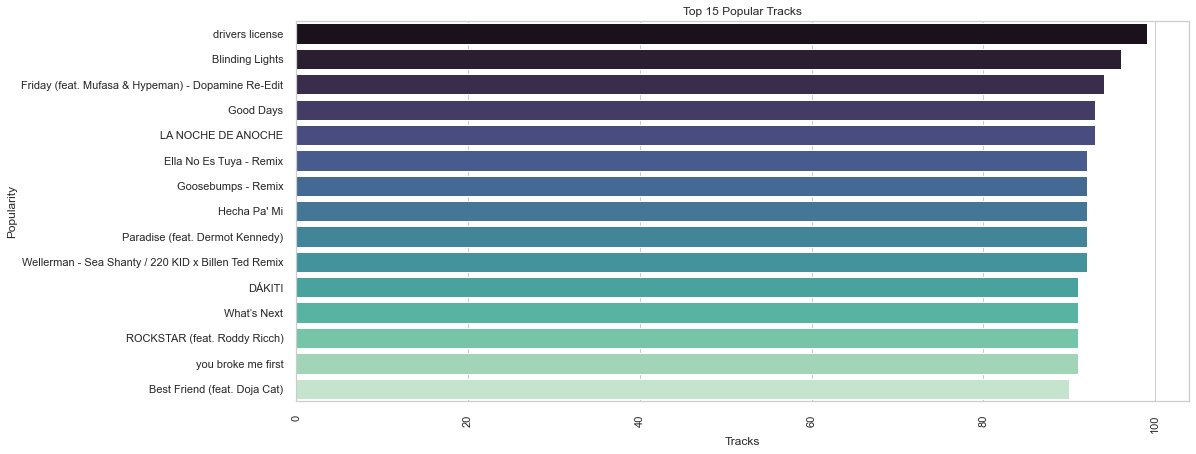

In [27]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = dataframe.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [28]:
dataframe.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)

name
drivers license                                        99.0
Blinding Lights                                        96.0
Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit     94.0
Good Days                                              93.0
LA NOCHE DE ANOCHE                                     93.0
Ella No Es Tuya - Remix                                92.0
Goosebumps - Remix                                     92.0
Hecha Pa' Mi                                           92.0
Paradise (feat. Dermot Kennedy)                        92.0
Wellerman - Sea Shanty / 220 KID x Billen Ted Remix    92.0
DÁKITI                                                 91.0
What’s Next                                            91.0
ROCKSTAR (feat. Roddy Ricch)                           91.0
you broke me first                                     91.0
Best Friend (feat. Doja Cat)                           90.0
Name: popularity, dtype: float64

As we have noted throughout this project is that popularity is heavily dependent on the timeframe. As we see, Dakiti has the highest popularity rating by this graph, but was released on October 30th, 2020. Using this data in our regression will give us a snapshot as to the attributes popular songs have for mid-2020, but may not work or become less relevant once we get further from this date.

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

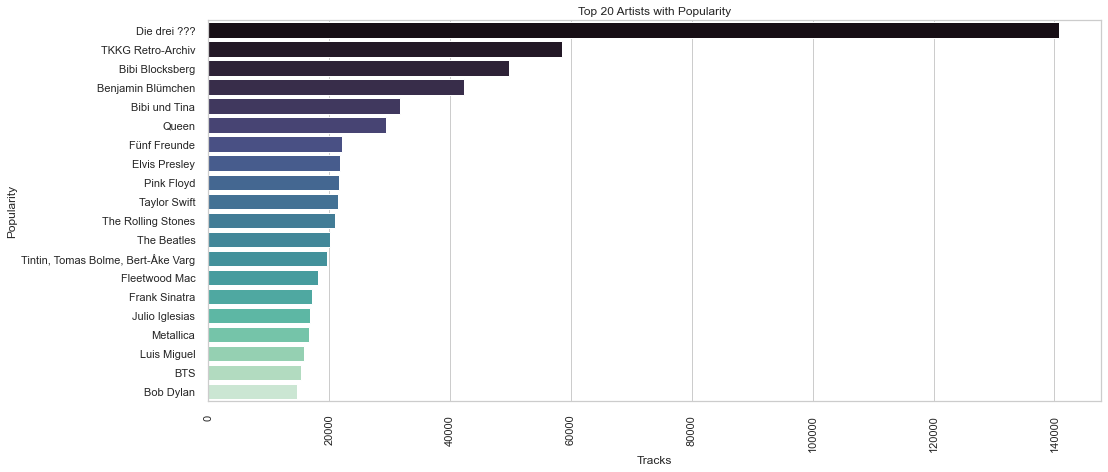

In [29]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = dataframe.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

Most Popular artist from 1921-2020 - Die drei

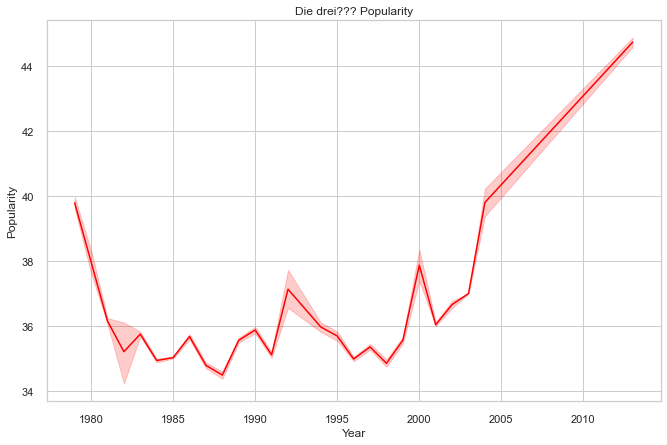

In [30]:
# visualize the popularity of Die drei??? songs over the year
Die = dataframe[dataframe['artists'] == 'Die drei ???']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='release_date', y='popularity', data=Die, color='red')
# Labels
plt.title("Die drei??? Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

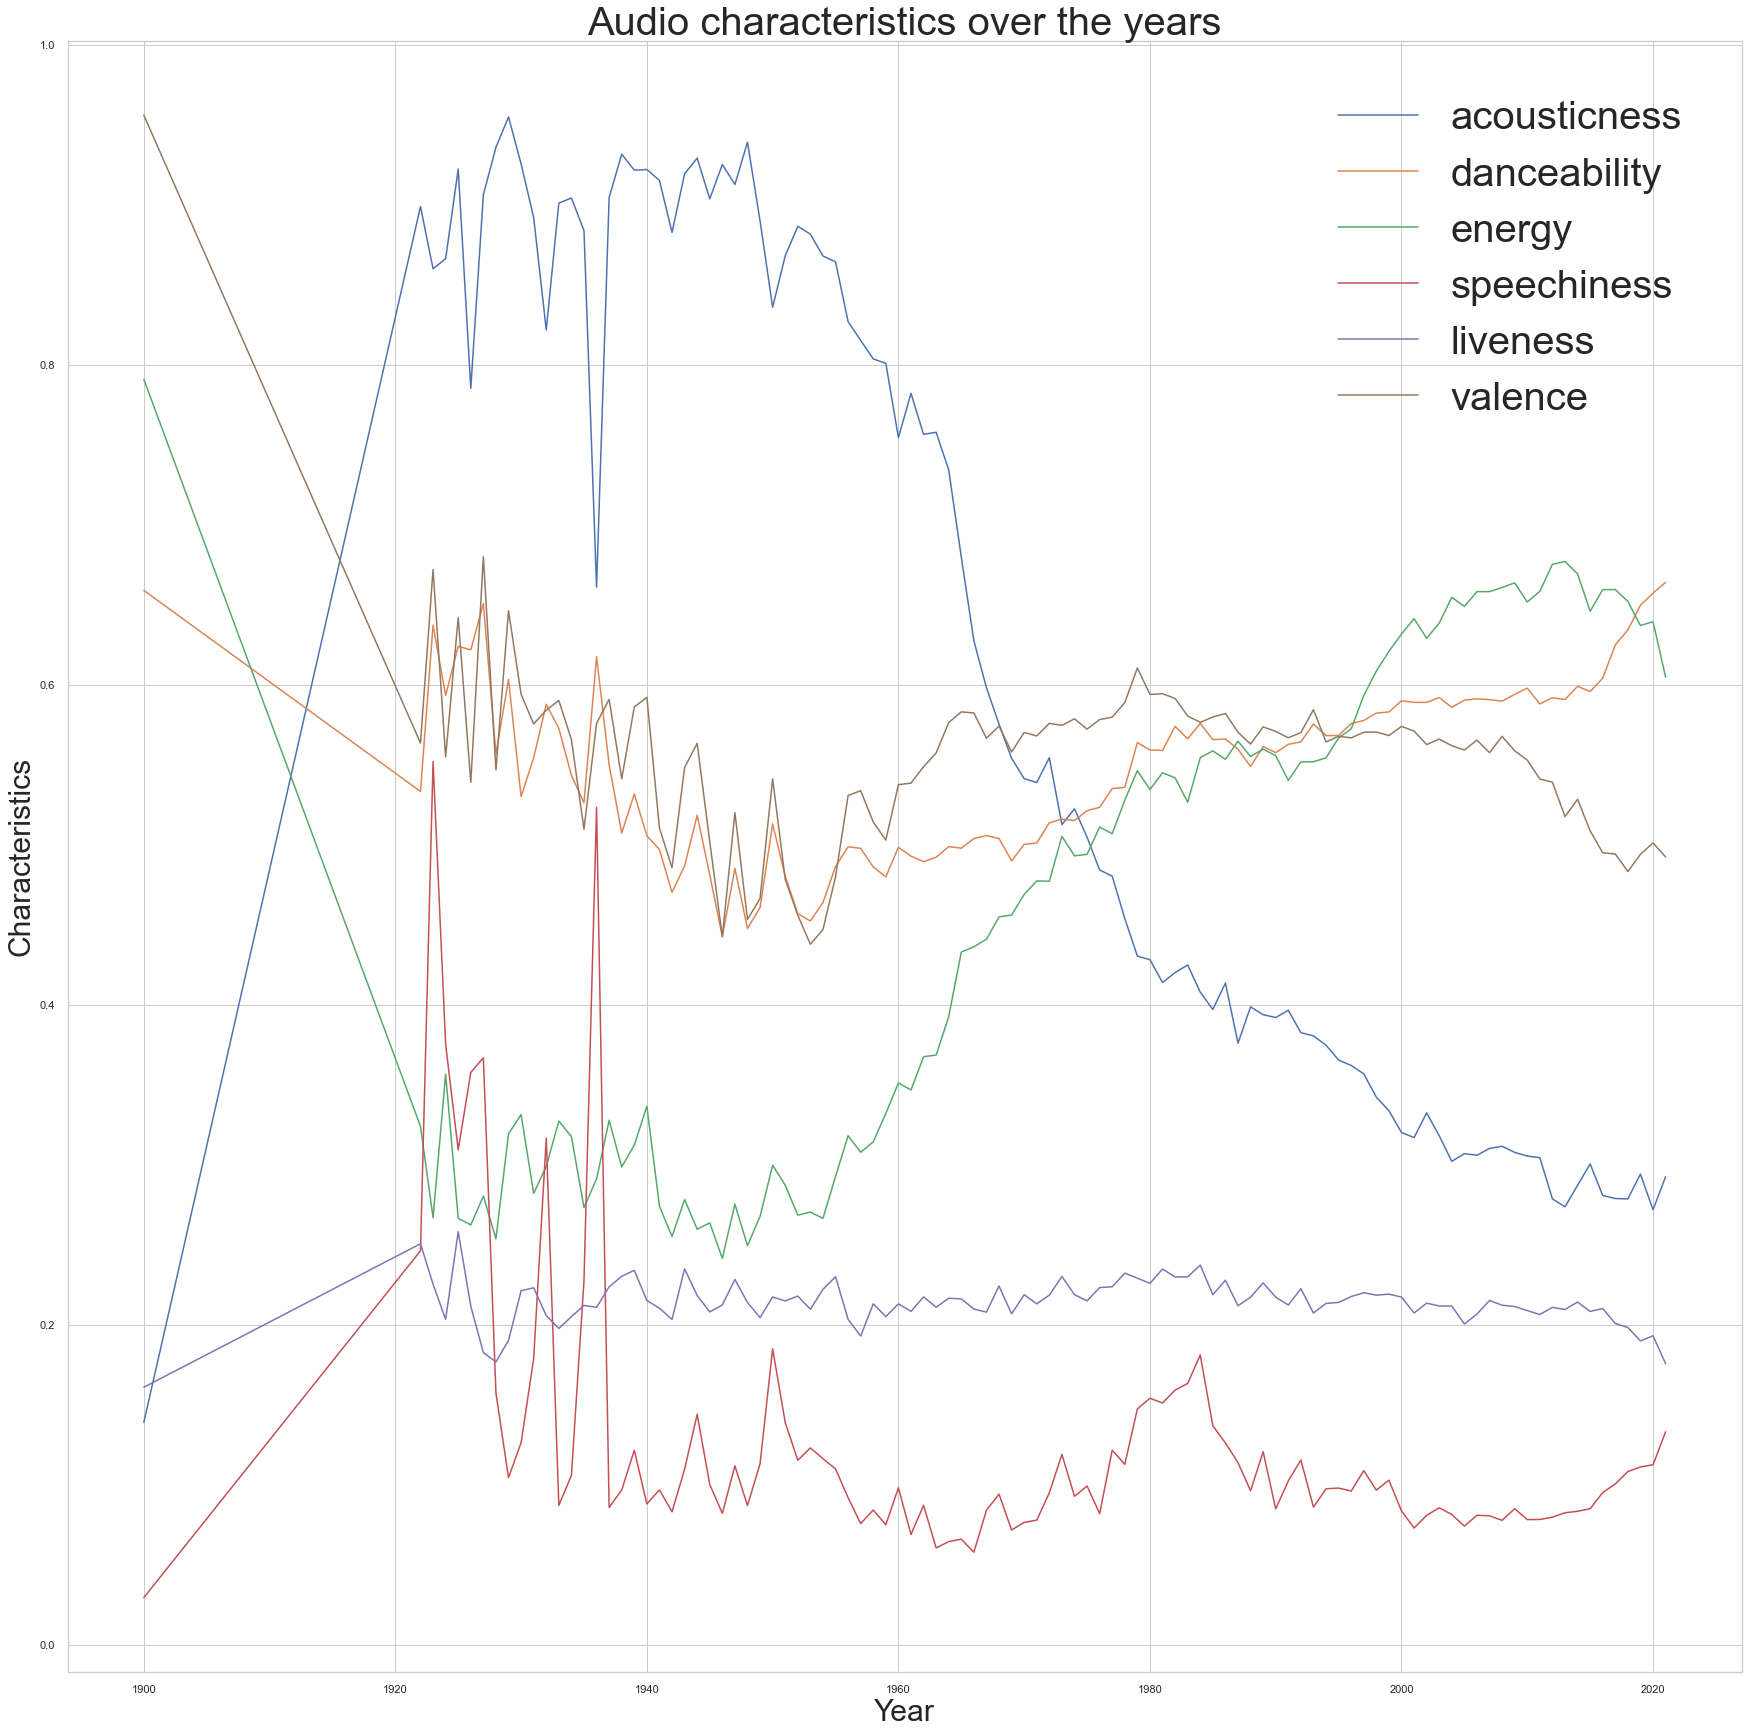

In [31]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,30))
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 40}, loc = 'upper right')
plt.show()

Observation - Over the Years we can see gradual increase for Danceability, Energy and gradual decrease for Acousticness

1) Acousticness has decreased significantly. Most tracks past 1960 used electric instruments and, especially past the 1980s, electronic sounds. Most recorded music today includes both electric and electronic elements.

2) Danceability has varied significantly, but has stayed mostly at the same level since 1980.

3) Energy seems to be inversely related to acousticness: Was very low in the first part of the century, but then rose signficantly after 1960. It looks like it increased even more after 2000 as well.

4) Speechiness looks like it varied a lot in the first part of the 20th century, but then settled low around 1960. Note we do see a slight increase after 1980. This is likely due to the growth of rap music. Mostly music, however, is still mostly sung.

5) Liveness looks like it has always stayed relatively low. Most recorded music on Spotify was made with not audience present.

6) Valence seems to have risen until 2000 with energy and danceability, but has fallen since.

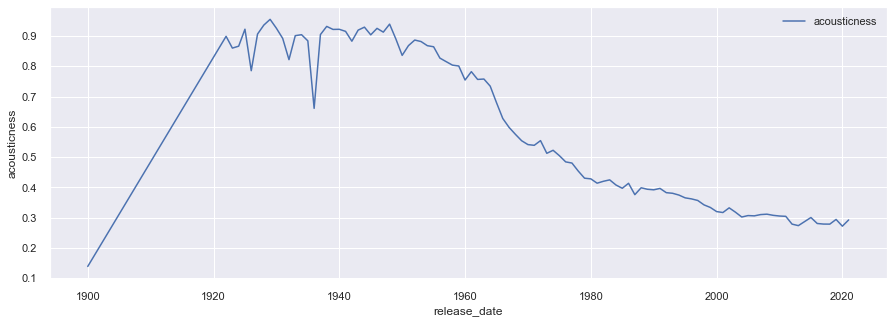

In [47]:
columns = ["acousticness"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

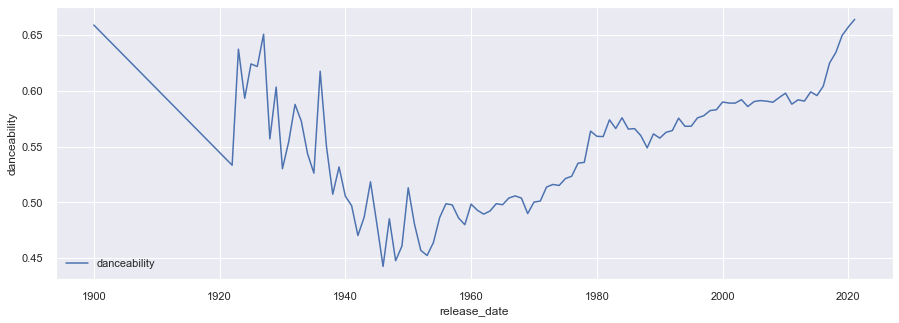

In [45]:
columns = ["danceability"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

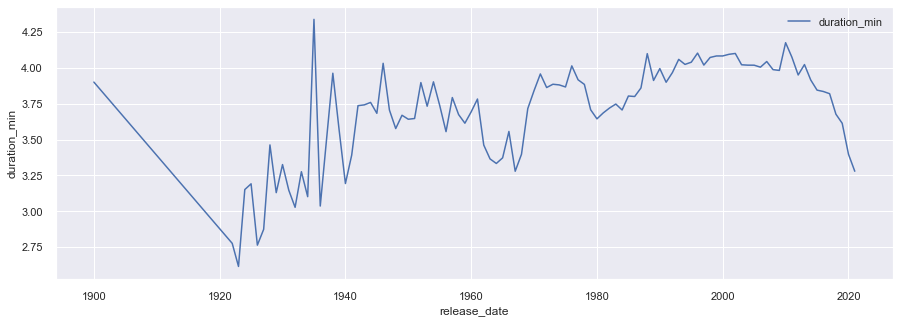

In [48]:
columns = ["duration_min"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

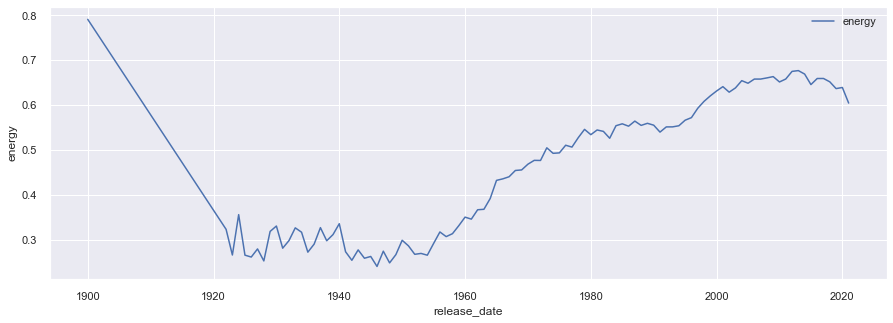

In [49]:
columns = ["energy"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

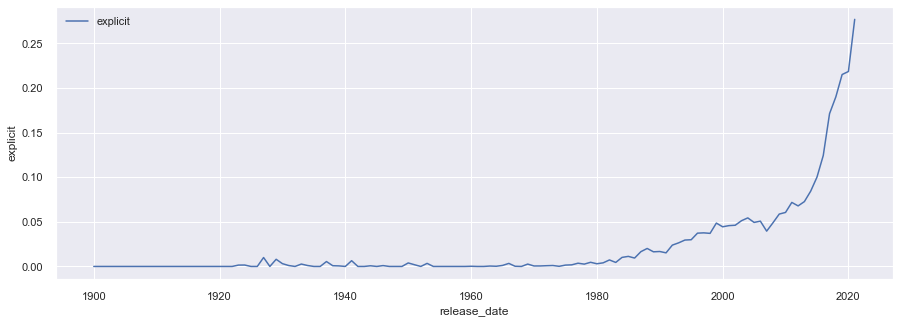

In [50]:
columns = ["explicit"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

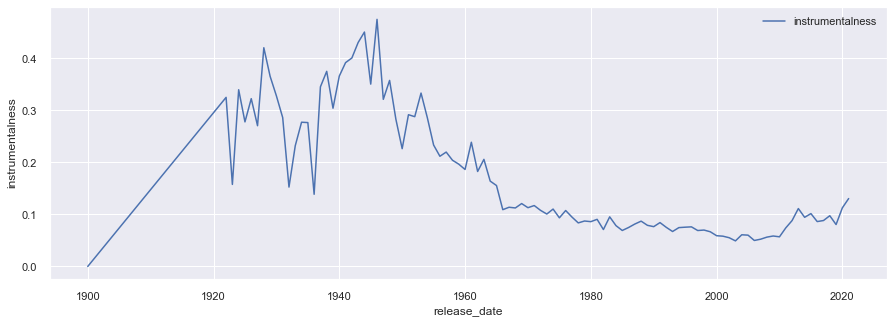

In [51]:
columns = ["instrumentalness"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

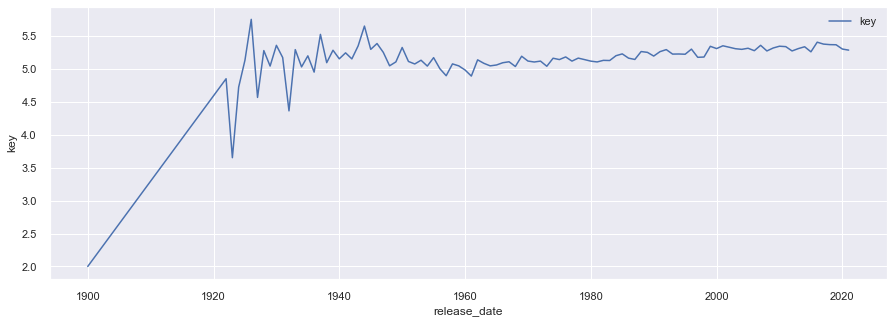

In [52]:
columns = ["key"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

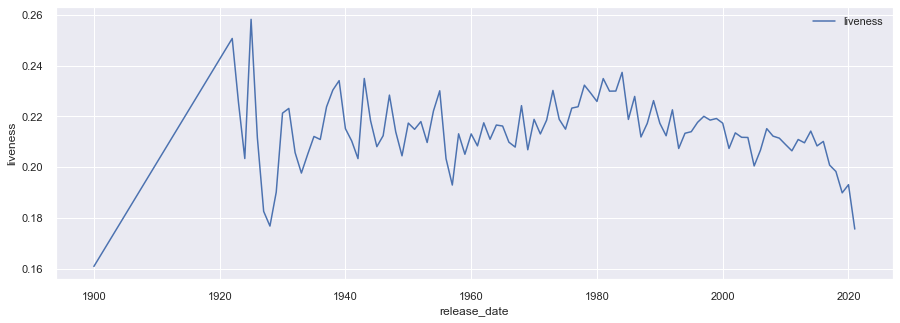

In [53]:
columns = ["liveness"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

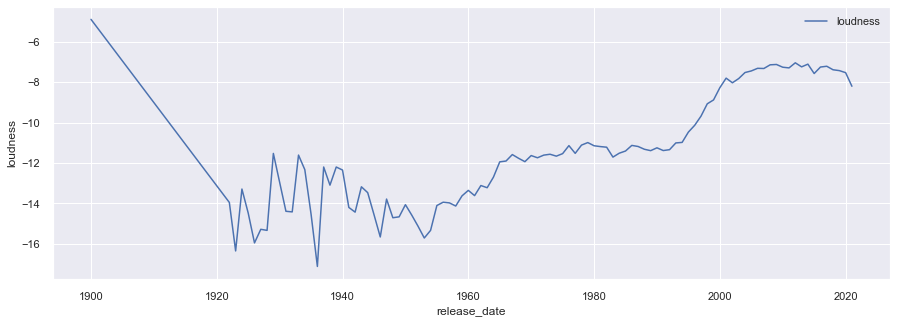

In [54]:
columns = ["loudness"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

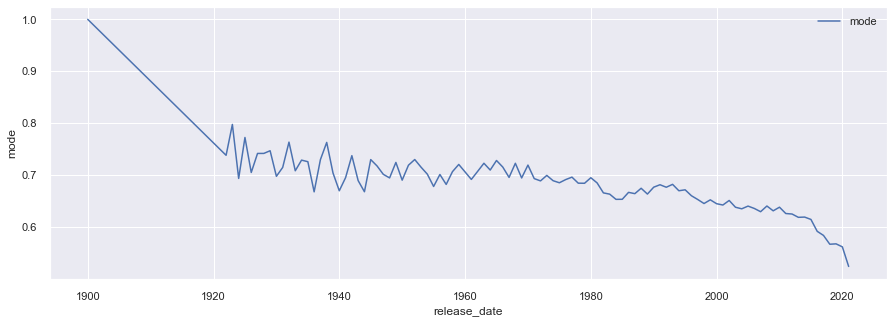

In [55]:
columns = ["mode"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

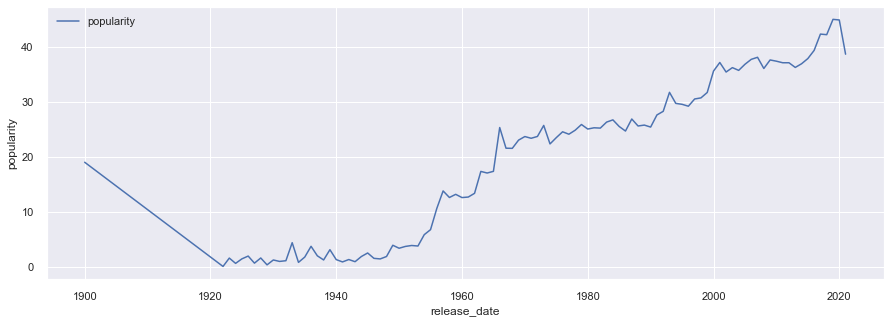

In [56]:
columns = ["popularity"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

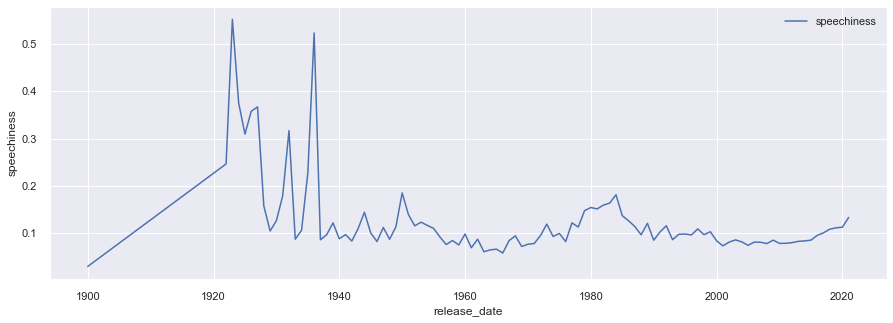

In [57]:
columns = ["speechiness"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

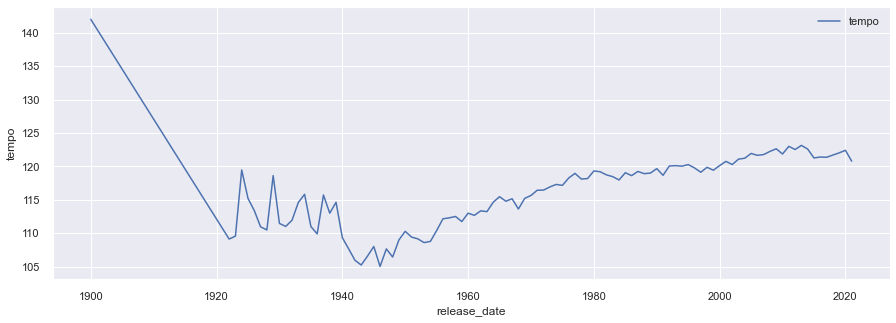

In [58]:
columns = ["tempo"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

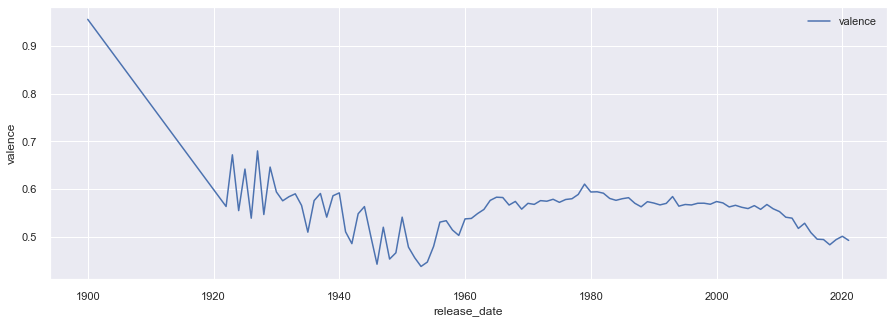

In [59]:
columns = ["valence"]
for c in columns:
    x = dataframe.groupby('release_date')[c].mean()
    plt.figure(figsize=(15,5))
    sns.set_style("darkgrid")
    sns.lineplot(x.index,x,label=c)

Observation

Acousticness and instrumentaliness decreases from time to time (lowest in 2020)
Danceability, Energy, Explicit, Loudness, and Tempo increases through time
Speechiness stays within 0.1 to 0.2 after 1960

In [60]:
y=pd.DataFrame(dataframe['artists'].value_counts().head()).reset_index()
y.columns=['Artists','Songs_Count']
y

,Artists,Songs_Count
0,Die drei ???,3856
1,TKKG Retro-Archiv,2006
2,Benjamin Blümchen,1500
3,Bibi Blocksberg,1462
4,Lata Mangeshkar,1370


'Die drei???' is the artist with 1211 songs

Number of songs released Year Wise

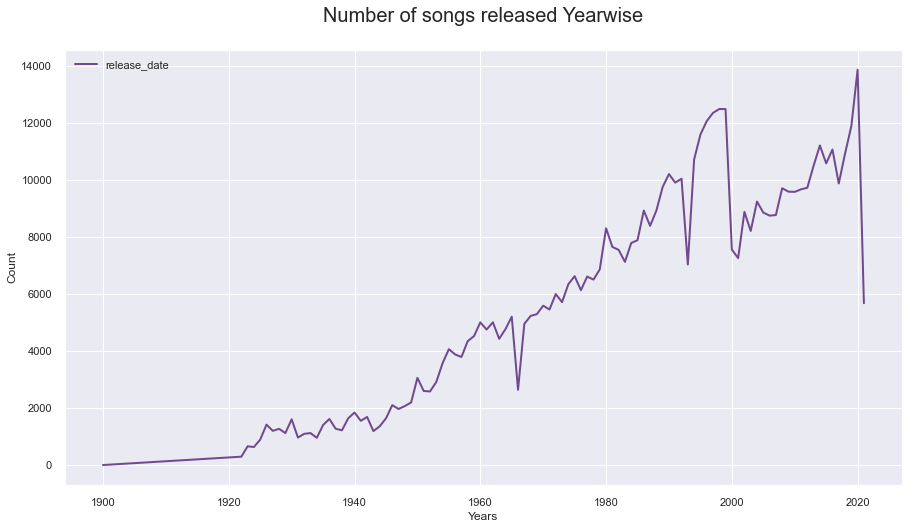

In [62]:
Year = pd.DataFrame(dataframe['release_date'].value_counts())
Year = Year.sort_index()
ax=Year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

2103 songs are released in year 2018

From the dataset creator's own comments, it's likely these are the 2000 most popular songs from each selected year.

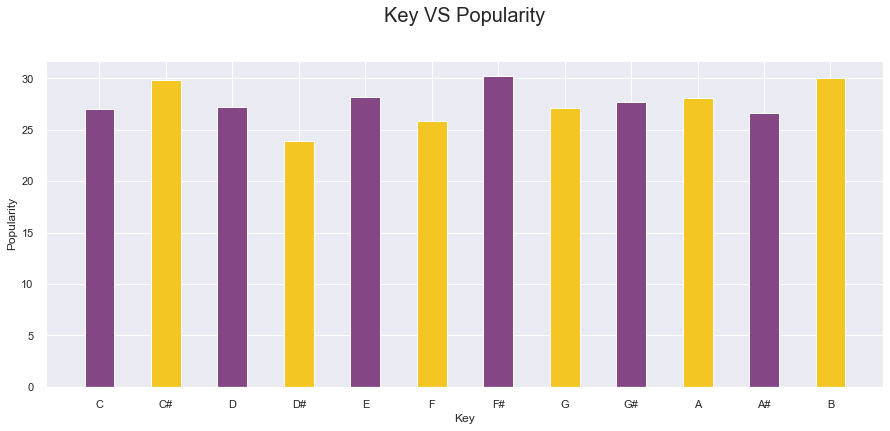

In [64]:
keypop = pd.DataFrame(dataframe.groupby('key')['popularity'].mean()).reset_index()
keypop.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure(figsize=(15,6))
plt.bar( keypop['key'],
         keypop['popularity'],
         width=0.45,
         color = ['#844685','#f3c623'])
plt.title('Key VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
ax.axes.get_xaxis().set_visible(True)

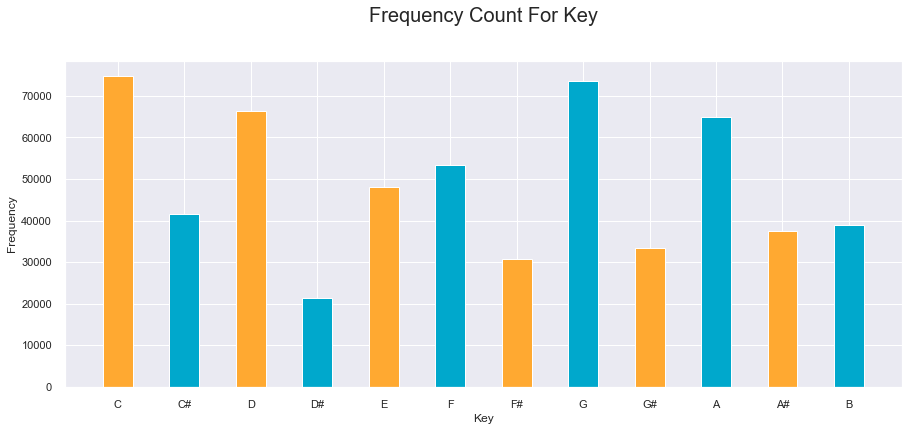

In [65]:
key = pd.DataFrame(dataframe['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(15,6))
plt.bar( key['index'],
         key['key'],
         width=0.45,
         color = ['#ffa931','#00a8cc'])
plt.title('Frequency Count For Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
ax.axes.get_xaxis().set_visible(True)

Feature Selection

We need to design a ML Model that can predicts the Popularity based on the features available. In order to select the features for the model I am using YellowbrickFeature Correlation Visualizer.

This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.

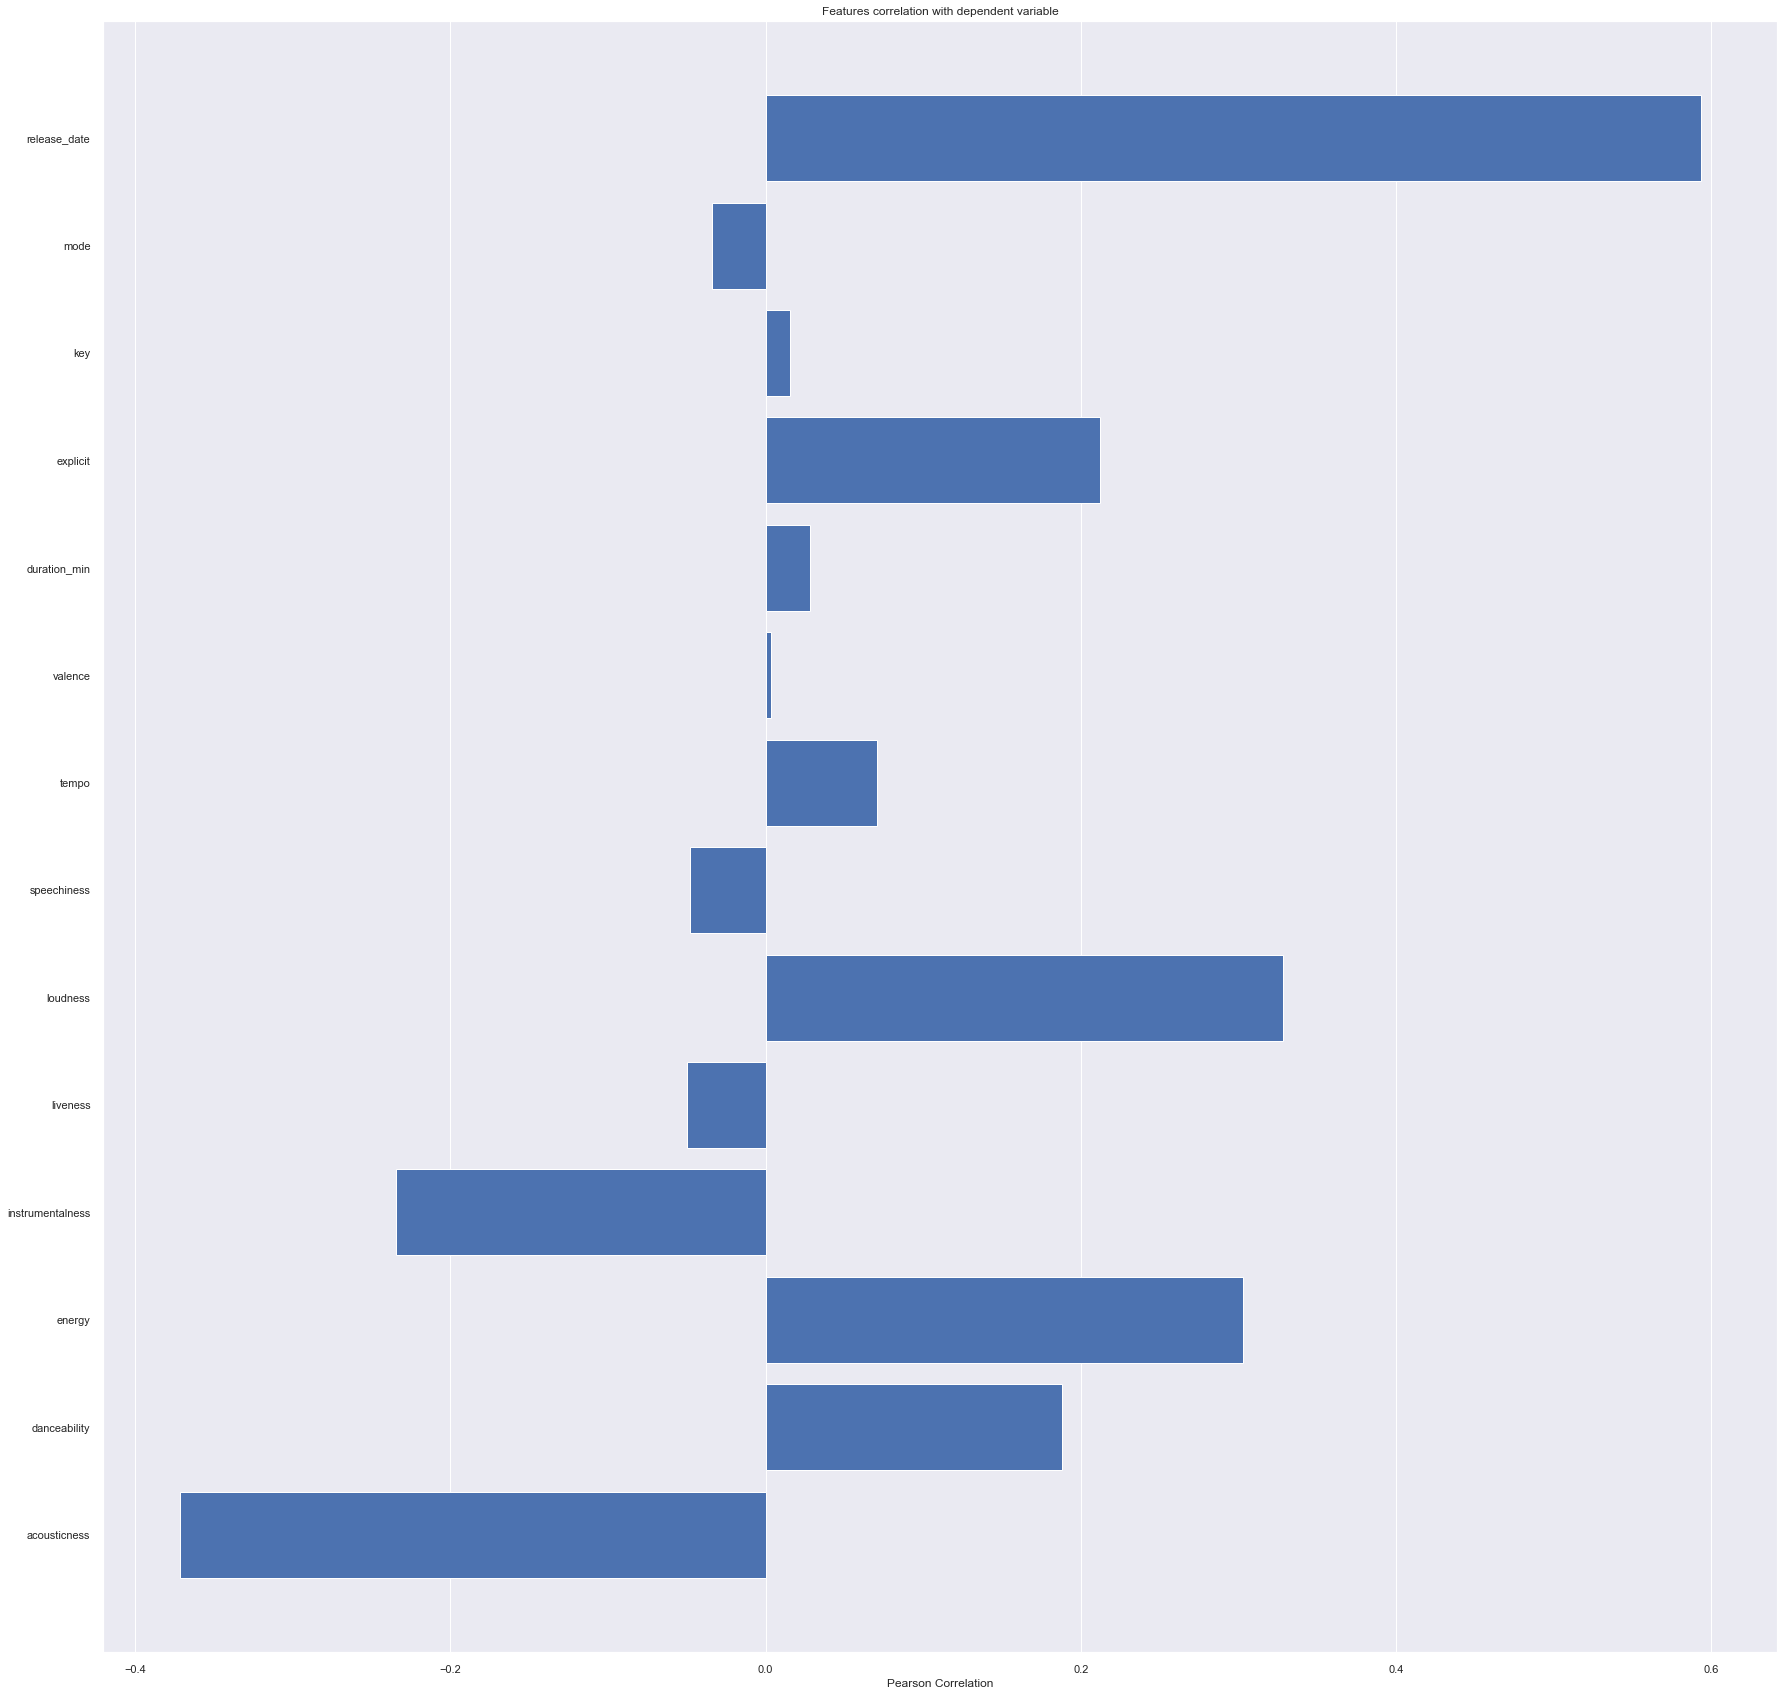

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [68]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','explicit','key','mode','release_date']

X, y = dataframe[feature_names], dataframe['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(30,30)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  

Observation From the above graph it is clear that 5 features with negative correlation and 9 features with positive correlation

Feature Selection - Choosing which Features can be used in model

1) id: id is unique for each track, therfore cannot assist a model and will be dropped.

2) name: There are 132,940 unique values. This is bit problematic categorical feature to insert in a model, and will be dropped.

3) release_date/year: Release date contains full date along with year. So instead of keeping both the columns Release_date can be dropped and year can be inserted into model

Pre Processing

In [69]:
cols = list(pd.read_csv('data/data.csv', nrows =1))
dataframe1 = pd.read_csv('data/data.csv', usecols=[i for i in cols if i not in ['id','name','release_date']])

# Remove duplicated
dataframe1 = dataframe1[~dataframe1.duplicated()==1]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(dataframe1.drop('popularity', axis=1), dataframe1['popularity'], test_size = 0.2, random_state = 42)

In [70]:
X_train.head()

,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
381799,154920,0,['Jerry Goldsmith'],['7t8q7ikEtcPNtoaKAm9Vu6'],0.171,0.150,5,-15.456,0,0.0380,0.57100,0.030000,0.1350,0.124,80.552,4
191688,190947,0,['Electric Light Orchestra'],['7jefIIksOi1EazgRTfW2Pk'],0.518,0.683,2,-8.370,1,0.0369,0.19400,0.005330,0.2180,0.700,106.026,4
576029,204817,0,"['Twenty-Nine Eleven', '6cyclemind']","['5GoU6Zkbt3w10nTYq6vBQh', '3nZa8vRD64ueq3d0JN...",0.522,0.327,11,-7.422,1,0.0289,0.27600,0.000049,0.0733,0.229,141.704,4
568867,180107,0,['Joy'],['7mZvWxGgI4wXWJ4LKHnQ6T'],0.614,0.873,5,-6.274,0,0.0403,0.00491,0.903000,0.3950,0.837,119.998,4
119925,131135,0,['The Kinks'],['1SQRv42e4PjEYfPhS0Tk9E'],0.741,0.927,0,-7.014,1,0.0540,0.15300,0.000003,0.0635,0.963,146.848,4


Here we need to replace/modify few data

object data of the artists with some numerical indicator that identify the artist.

Eliminates Zero values from tempo columns and replace it
standardizing Instrumental Criteria with numeric values
We use OneHotEncoder from SKlearn to create dummies
MinMaxScaling for relevant features
Target Scaling

Features Transformations

In [71]:
class Artists:
    """
     This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
    
    """
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_dataframe = None

    def fit (self, X, y):
        self.artists_dataframe =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_dataframe.loc['unknown'] = [y.mean(), 1]
        self.artists_dataframe.loc[self.artists_dataframe['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_dataframe.loc[self.artists_dataframe['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_dataframe.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_dataframe['mean'])
        return X
  
    
#Instrumental Transformer Criteria

def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))
    
    
class Tempo():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X
    


In [72]:
# Apply Aritists class on train and test seperatly
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

One Hot Encoder

More Info on how to create dummies can be found here One Hot Encoder Sklearn Library

In [73]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

MinMaxScaler

In [75]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

Target Scaling

In [76]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

Decision Tree Regressor Model

In [78]:
def Decision_tree(X_train,y_train,X_test,y_test,min_samples_split,max_leaf_nodes):
    """
    Design ML model and returns r2-score and Mean squared Error for Train and Test Datasets
    
    INPUT:
    :param X_train: 
    :param y_train: 
    :param X_test: 
    :param y_test: 
    :param min_samples_split: 
    :param max_leaf_nodes: 
    OUTPUT:
    train_rmse - Root Mean Squared Error for Train dataset
    test_rmse - Root Mean Squared Error for Train dataset
    r2_train - r2-score for Train Dataset
    r2_test - r2-score for Test Dataset
    y_train_pred and y_test_pred - For Visualizing purpose
    mae - Mean Absolute Error
    """
    
    
    tree = DecisionTreeRegressor(max_leaf_nodes =max_leaf_nodes , min_samples_split =min_samples_split )
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    
    y_test_pred = tree.predict(X_test)
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    
    r2_test= r2_score(y_test, y_test_pred)
    
    mae = (abs(y_test - y_test_pred)).mean() 
    
    return train_rmse,test_rmse,r2_train,r2_test,y_train_pred,y_test_pred,mae

train_rmse, test_rmse, r2_train, r2_test,y_train_pred,y_test_pred,mae= Decision_tree(X_train,y_train,X_test,y_test,min_samples_split = 200,max_leaf_nodes=167)

print("Root Mean Squared Error for Train dataset is {}".format(train_rmse))
print("Root Mean Squared Error for Test  dataset is {}".format(test_rmse))
print("r2-score for Train Dataset is {}".format(r2_train))
print("r2-score for Test Dataset is {}".format(r2_test))
print("Mean Absolute Error for Test dataset is {}".format(mae))

ValueError: could not convert string to float: "['7t8q7ikEtcPNtoaKAm9Vu6']"

In [79]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((467387, 27), (467387,), (116847, 27), (116847,))

In [80]:
y_train_pred.shape, y_test_pred.shape

NameError: name 'y_train_pred' is not defined

In [81]:
#Plot the results for Train Datasets
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
ax.set_ylabel('popularity prediction')
ax.set_title('Train Dataset')
plt.show()

NameError: name 'y_train_pred' is not defined

In [ ]:
#plot the results for Test dataset
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')
ax.set_ylabel('popularity prediction')
ax.set_title('Test Dataset')
plt.show()

Decision Tree with GridSearch CV

Using GridSearchCV to find the optimal hyperparameters for the decision tree to predict song popularity.

In [ ]:
n_features = df.shape[1]
n_samples = df.shape[0]
 
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'max_depth': [None,5,6,7,8,9,10,11],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )
 
grid.fit(X_train, y_train)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(X_test,y_test))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

In [ ]:
# Decision tree with tuned hyperparameters using GridSearchCV
dec_tree2 = DecisionTreeRegressor(max_depth=9, max_features=None, 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
dec_tree2.fit(X_train,y_train)
y_test_pred2 = dec_tree2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_test_pred2)
print(f'Mean absolute error of this model: {mae2:.3f}')

## Tweaking the max_leaf_nodes argument

In [ ]:
RMSE3_train, RMSE3_test = [], []

for i in range(2,200):
    tree = DecisionTreeRegressor(random_state = 15, max_leaf_nodes=i)
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train).clip(0, 1)
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    RMSE3_train.append(train_rmse.round(3))
    y_test_pred = tree.predict(X_test).clip(0, 1)
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    RMSE3_test.append(test_rmse.round(3))

In [ ]:
x = np.arange(2, 200)
ax = sns.lineplot(x=x, y=RMSE3_train)
sns.lineplot(x=x, y=RMSE3_test, ax=ax)
ax.axvline(x=178, ymin=0, ymax=0.3, color='blue')
# ax.axvline(x=139, ymin=0.5, ymax=0.8, color='orange')
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Max Leaf Nodes')
ax.set_ylabel('RMSE')
ax.set_title('DT with range(0,200)', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [ ]:
gap3 = [(RMSE3_train[i]/RMSE3_test[i]) for i, num in enumerate(RMSE3_train)]

print(f'Minimum validiation is: {min(gap3):.3%} in index number {gap3.index(min(gap3))}')
print(f'Maximum validiation is: {max(gap3):.3%} in index number {gap3.index(max(gap3))}')

Minimum validiation is: 76.786% in index number 140
Maximum validiation is: 101.695% in index number 1
We also tested the data with different test size, in order to check the influence on the results.

Eventually, the best model was a Decision Tree run with test size = 0.2, max_leaf_nodes = 167, max_depth = 9, min_samples_leaf = 1, min_samples_split = 2.

## RandomForest Regressor

In [ ]:
def Randomforest(X_train,y_train,X_test,y_test):
    """
    Design Random Forest Regressor model and returns r2-score and Mean squared Error for Train and Test Datasets
    INPUT:
    :param X_train: 
    :param y_train: 
    :param X_test: 
    :param y_test: 
    OUTPUT:
    Test Accuracy
    Mean Absolute Error
    r2-score for Train and Test datasets
    """
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    
    preds = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)

    mae = (abs(y_test - preds)).mean() 
    y_train_pred = clf.predict(X_train)
    
    y_test_pred = tree.predict(X_test)

    
    r2_train = r2_score(y_train, y_train_pred)
    
    r2_test= r2_score(y_test, y_test_pred)
    
    return accuracy,mae,r2_train,r2_test

accuracy,mae,r2_train,r2_test =  Randomforest(X_train,y_train,X_test,y_test)
print("Test Accuracy: {:.4f}".format(accuracy*100))
print("Mean Absolute Error: {:.4f} ".format(mae))
print("r2-score of Train Dataset is {} and Test Dataset is {}".format(r2_train*100, r2_test*100))

## Artist Recommendation System
Build a content-based recommendation engine which suggests artists

### Normalize Columns

In [ ]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

In [82]:
#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

NameError: name 'df' is not defined

### Kmeans Clustering

In [ ]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
normalize_column('pred')

In [ ]:
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [3,7,13]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [ ]:
df.drop(['release_date','Song Decade'],axis=1,inplace=True)

In [ ]:
#Instanstiate the Recommender Class
recommender = Song_Recommender(df)
recommender.get_recommendations('Red Roses (feat. Landon Cube)', 5)

In [ ]:
recommender.get_recommendations('canon in d', 10)

In [ ]:
recommender.get_recommendations('dynamite', 10)

In [ ]:
recommender.get_recommendations('lovely', 10)

In [ ]:
recommender.get_recommendations('lonely', 10)

In [ ]:
recommender.get_recommendations('senorita', 10)